In [1]:
import pandas as pd
import os
from collections import Counter
import itertools
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
os.listdir()
sns.set()

In [3]:
data = pd.read_csv('data.csv')
data.head()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
0,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,The park is open.,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015
1,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,What a Lovely Day.,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015
2,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,One Choice Can Destroy You,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015
3,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,Every generation has a story.,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015
4,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,Vengeance Hits Home,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015


In [3]:
data.tail()

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year
1885,tt0120903,0.182246,75000000,157299717,X-Men,Patrick Stewart|Hugh Jackman|Ian McKellen|Hall...,Bryan Singer,Evolution Begins,"Two mutants, Rogue and Wolverine, come to a pr...",104,Adventure|Action|Science Fiction,Twentieth Century Fox Film Corporation|Donners...,7/13/2000,2766,6.6,2000
1886,tt0192255,0.123920,22000000,13555988,The Little Vampire,Richard E. Grant|Jonathan Lipnicki|Jim Carter|...,Uli Edel,"They're not just best friends, they're blood b...","Based on the popular books, the story tells of...",95,Horror|Family|Foreign,New Line Cinema,10/27/2000,42,6.4,2000
1887,tt0131704,0.104908,76000000,35134820,The Adventures of Rocky & Bullwinkle,Rene Russo|Jason Alexander|Piper Perabo|Randy ...,Des McAnuff,This summer it's not the same old bull.,Rocky and Bullwinkle have been living off the ...,88,Adventure|Animation|Action|Comedy|Family,Universal Pictures|Capella International|KC Me...,6/30/2000,35,4.0,2000
1888,tt0162983,0.031018,40000000,36037909,Hanging Up,Meg Ryan|Diane Keaton|Lisa Kudrow|Walter Matth...,Diane Keaton,Every family has a few hang-ups.,A trio of sisters bond over their ambivalence ...,94,Comedy|Drama,Laurence Mark Productions|Columbia Pictures Co...,2/16/2000,21,5.2,2000
1889,tt0163676,0.015997,15000000,5217498,The In Crowd,Susan Ward|Lori Heuring|Matthew Settle|Nathan ...,Mary Lambert,What would you do to get in?,A mentally disturbed young woman takes a job a...,105,Thriller,Warner Bros. Pictures,7/19/2000,12,5.2,2000


# Dataset preprocessing

In [109]:
print(f'Total amount of observations in dataset: {len(data)}')

Total amount of observations in dataset: 1890


In [5]:
# Let's see if there are any NaN-Values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1890 entries, 0 to 1889
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1890 non-null   object 
 1   popularity            1890 non-null   float64
 2   budget                1890 non-null   int64  
 3   revenue               1890 non-null   int64  
 4   original_title        1890 non-null   object 
 5   cast                  1890 non-null   object 
 6   director              1890 non-null   object 
 7   tagline               1890 non-null   object 
 8   overview              1890 non-null   object 
 9   runtime               1890 non-null   int64  
 10  genres                1890 non-null   object 
 11  production_companies  1890 non-null   object 
 12  release_date          1890 non-null   object 
 13  vote_count            1890 non-null   int64  
 14  vote_average          1890 non-null   float64
 15  release_year         

In [6]:
# Answer list - we will add every answer to this list
answer_ls = []

# 1. У какого фильма из списка самый большой бюджет?
Варианты ответов:
1. The Dark Knight Rises (tt1345836)
2. Spider-Man 3 (tt0413300)
3. Avengers: Age of Ultron (tt2395427)
4. The Warrior's Way	(tt1032751)
5. Pirates of the Caribbean: On Stranger Tides (tt1298650)

In [23]:
%%time
data[data.budget == data.budget.max()].original_title

Wall time: 4 ms


491    The Warrior's Way
Name: original_title, dtype: object

In [24]:
%%time
# The biggest budget
data.loc[data.budget == data.budget.max(), 'original_title']

Wall time: 0 ns


491    The Warrior's Way
Name: original_title, dtype: object

In [8]:
answer_ls.append(4)

# 2. Какой из фильмов самый длительный (в минутах)
1. The Lord of the Rings: The Return of the King	(tt0167260)
2. Gods and Generals	(tt0279111)
3. King Kong	(tt0360717)
4. Pearl Harbor	(tt0213149)
5. Alexander	(tt0346491)

In [25]:
# The longest movie
data.loc[data.runtime == data.runtime.max(), 'original_title']

1158    Gods and Generals
Name: original_title, dtype: object

In [10]:
answer_ls.append(2)

# 3. Какой из фильмов самый короткий (в минутах)
Варианты ответов:

1. Home on the Range	tt0299172
2. The Jungle Book 2	tt0283426
3. Winnie the Pooh	tt1449283
4. Corpse Bride	tt0121164
5. Hoodwinked!	tt0443536

In [26]:
# The shortest movie
data.loc[data.runtime == data.runtime.min(), 'original_title']

769    Winnie the Pooh
Name: original_title, dtype: object

In [12]:
answer_ls.append(3)

# 4. Средняя длительность фильма?

Варианты ответов:
1. 115
2. 110
3. 105
4. 120
5. 100


In [34]:
print(f'Mean movie duration: {round(data.runtime.mean())} minutes')

Mean movie duration: 110 minutes


In [14]:
answer_ls.append(2)

# 5. Средняя длительность фильма по медиане?
Варианты ответов:
1. 106
2. 112
3. 101
4. 120
5. 115




In [33]:
print(f'Median movie duration: {round(data.runtime.median())} minutes')

Median movie duration: 106 minutes


In [16]:
answer_ls.append(1)

# 6. Какой самый прибыльный фильм?
Варианты ответов:
1. The Avengers	tt0848228
2. Minions	tt2293640
3. Star Wars: The Force Awakens	tt2488496
4. Furious 7	tt2820852
5. Avatar	tt0499549

In [4]:
data['profit'] = data.revenue - data.budget

In [7]:
data.loc[data.profit == data.profit.max(), 'original_title']

239    Avatar
Name: original_title, dtype: object

In [19]:
answer_ls.append(5)

# 7. Какой фильм самый убыточный?
Варианты ответов:
1. Supernova tt0134983
2. The Warrior's Way tt1032751
3. Flushed Away	tt0424095
4. The Adventures of Pluto Nash	tt0180052
5. The Lone Ranger	tt1210819

In [8]:
%%time
data[data.profit == data.profit.min()].original_title

Wall time: 4 ms


491    The Warrior's Way
Name: original_title, dtype: object

In [10]:
%%time
data.loc[data.profit == data.profit.min(), 'original_title']

Wall time: 2.52 ms


491    The Warrior's Way
Name: original_title, dtype: object

In [21]:
answer_ls.append(2)

# 8. Сколько всего фильмов в прибыли?
Варианты ответов:
1. 1478
2. 1520
3. 1241
4. 1135
5. 1398


In [46]:
%%time
data.loc[data.profit > 0].shape[0]

Wall time: 4 ms


1478

In [47]:
%%time
profitable = data.loc[data.profit > 0, 'original_title'].count()
print(f'Total amount of profitable movies: {profitable}')

Total amount of profitable movies: 1478
Wall time: 0 ns


In [23]:
answer_ls.append(1)

# 9. Самый прибыльный фильм в 2008 году?
Варианты ответов:
1. Madagascar: Escape 2 Africa	tt0479952
2. Iron Man	tt0371746
3. Kung Fu Panda	tt0441773
4. The Dark Knight	tt0468569
5. Mamma Mia!	tt0795421

In [53]:
%%time
data.query('release_year == 2008').query('profit == profit.max()').original_title

Wall time: 12 ms


600    The Dark Knight
Name: original_title, dtype: object

In [65]:
%%time
data.loc[data.release_year == 2008].sort_values(by='profit', ascending=False)['original_title'].iloc[0]

Wall time: 4 ms


'The Dark Knight'

In [25]:
answer_ls.append(4)

# 10. Самый убыточный фильм за период с 2012 по 2014 (включительно)?
Варианты ответов:
1. Winter's Tale	tt1837709
2. Stolen	tt1656186
3. Broken City	tt1235522
4. Upside Down	tt1374992
5. The Lone Ranger	tt1210819


In [72]:
%%time
data.query('2012 <= release_year <= 2014').query('profit == profit.min()').original_title

Wall time: 13.8 ms


1246    The Lone Ranger
Name: original_title, dtype: object

In [88]:
%%time
data.loc[(data.release_year>=2012) & (data.release_year<=2014)].sort_values(by='profit')['original_title'].iloc[0]

Wall time: 4 ms


'The Lone Ranger'

In [27]:
answer_ls.append(5)

# 11. Какого жанра фильмов больше всего?
Варианты ответов:
1. Action
2. Adventure
3. Drama
4. Comedy
5. Thriller

In [6]:
def counter(df, column: str) -> list:
    """
    Splits the string by '|' and counts
    the number of each element
    """
    result = pd.DataFrame(df[column].str.split('|').to_list()).stack().value_counts()
            
    return result

In [7]:
%%time
counter(data, 'genres')

Wall time: 12.7 ms


Drama              782
Comedy             683
Thriller           597
Action             583
Adventure          416
Crime              315
Romance            308
Family             260
Science Fiction    248
Fantasy            223
Horror             176
Mystery            168
Animation          139
Music               64
History             62
War                 58
Western             20
Documentary          8
Foreign              2
dtype: int64

In [201]:
# %%time
# genre_counter = Counter()

# for genres in data.genres.str.split('|'):
#     for genre in genres:
#         genre_counter[genre] += 1
        
# print(genre_counter.most_common(1))

[('Drama', 782)]
Wall time: 0 ns


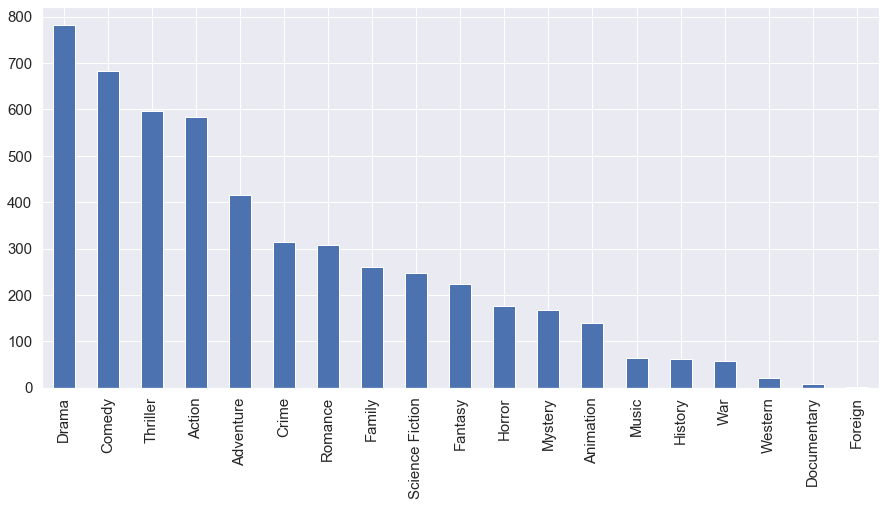

In [213]:
counter(data, 'genres').plot(kind='bar', figsize=(15, 7), fontsize=15)

In [31]:
answer_ls.append(3)

# 12. Какого жанра среди прибыльных фильмов больше всего?
Варианты ответов:
1. Drama
2. Comedy
3. Action
4. Thriller
5. Adventure

In [118]:
# profitable = data[data.profit > 0]
# genre_counter = Counter()

# for genres in profitable.genres:
#     for genre in genres:
#         genre_counter[genre] += 1
        
# genre_counter.most_common(1)

[('Drama', 560)]

In [210]:
profitable = data.loc[data.profit > 0]
counter(profitable, 'genres')

Drama              560
Comedy             551
Thriller           446
Action             444
Adventure          337
Romance            242
Crime              231
Family             226
Science Fiction    195
Fantasy            188
Horror             150
Animation          120
Mystery            119
Music               47
History             46
War                 41
Western             12
Documentary          7
dtype: int64

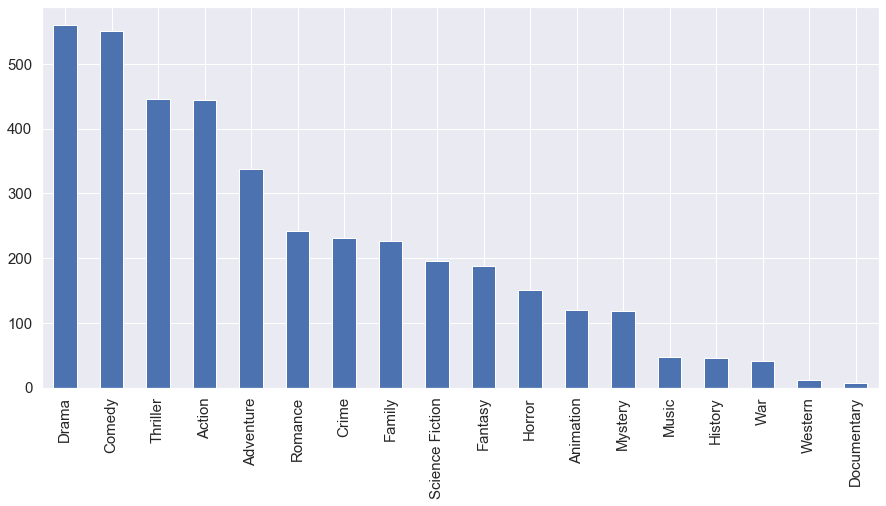

In [212]:
genres_in_profit = counter(profitable, 'genres')
genres_in_profit.plot(kind='bar', figsize=(15, 7), fontsize=15)

In [34]:
answer_ls.append(1)

# 13. Кто из режиссеров снял больше всего фильмов?
Варианты ответов:
1. Steven Spielberg
2. Ridley Scott 
3. Steven Soderbergh
4. Christopher Nolan
5. Clint Eastwood

In [35]:
# Let's take a look and notice that some movies have several directors
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(data.director)

0                                         Colin Trevorrow
1                                           George Miller
2                                        Robert Schwentke
3                                             J.J. Abrams
4                                               James Wan
5                          Alejandro GonzÃ¡lez IÃ±Ã¡rritu
6                                             Alan Taylor
7                                            Ridley Scott
8                                Kyle Balda|Pierre Coffin
9                                             Pete Docter
10                                             Sam Mendes
11                         Lana Wachowski|Lilly Wachowski
12                                           Alex Garland
13                                         Chris Columbus
14                                            Joss Whedon
15                                      Quentin Tarantino
16                                        Olivier Megaton
17            

In [8]:
counter(data, 'director')

Steven Soderbergh    13
Clint Eastwood       12
Ridley Scott         12
Robert Rodriguez     11
Steven Spielberg     10
                     ..
Leigh Whannell        1
Pat O'Connor          1
Frank Marshall        1
Tom Hanks             1
Mimi Leder            1
Length: 998, dtype: int64

In [120]:
# data.director = data.director.apply(spliter)
# director_counter = Counter()

# for directors in data.director:
#     for director in directors:
#         director_counter[director] += 1
        
# director_counter.most_common(1)

[('Steven Soderbergh', 13)]

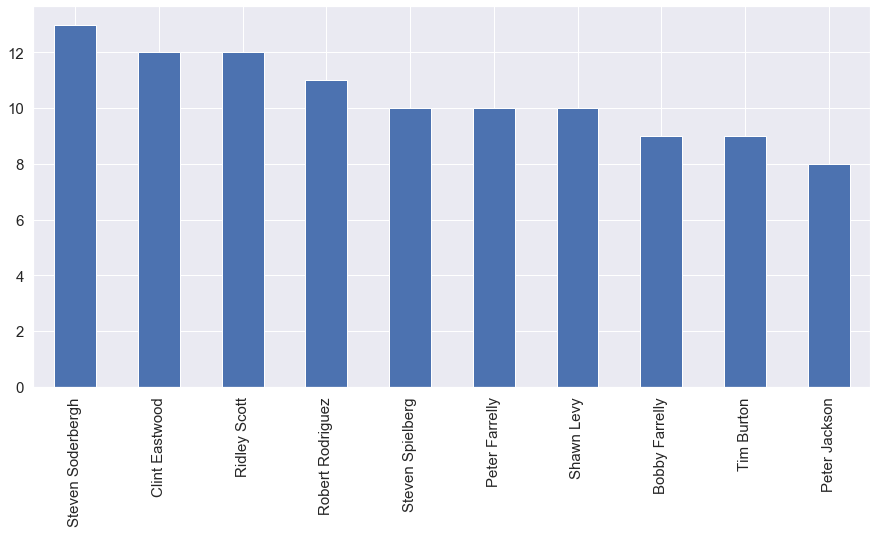

In [10]:
counter(data, 'director')[:10].plot(kind='bar', figsize=(15, 7), fontsize=15)

In [39]:
answer_ls.append(3)

# 14. Кто из режиссеров снял больше всего прибыльных фильмов?
Варианты ответов:
1. Steven Soderbergh
2. Clint Eastwood
3. Steven Spielberg
4. Ridley Scott
5. Christopher Nolan

In [11]:
profitable = data[data.profit > 0]
counter(profitable, 'director')

Ridley Scott         12
Steven Soderbergh    10
Steven Spielberg     10
Clint Eastwood       10
Tim Burton            9
                     ..
Nicholas Jarecki      1
Tate Taylor           1
Michael Sucsy         1
Jan de Bont           1
Mimi Leder            1
Length: 814, dtype: int64

In [41]:
# director_counter = Counter()

# for directors in profitable.director:
#     for director in directors:
#         director_counter[director] += 1
        
# director_counter.most_common(1)

[('Ridley Scott', 12)]

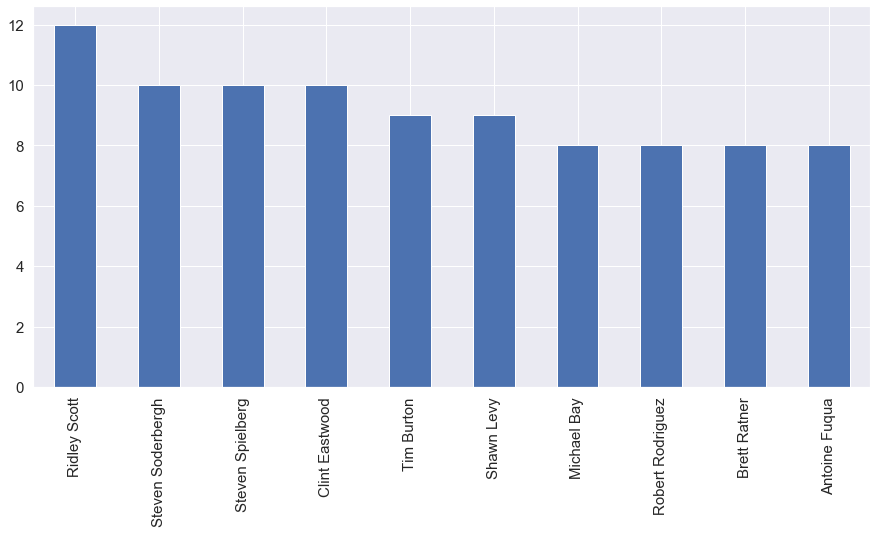

In [12]:
counter(profitable, 'director')[:10].plot(kind='bar', figsize=(15, 7), fontsize=15)

In [43]:
answer_ls.append(4)

# 15. Кто из режиссеров принес больше всего прибыли?
Варианты ответов:
1. Steven Spielberg
2. Christopher Nolan
3. David Yates
4. James Cameron
5. Peter Jackson


In [122]:
# dir_profit = Counter()

# i = 0
# for directors in data.director.str.split('|'):
#     for director in directors:
#         dir_profit[director] += data.profit.iloc[i]
#     i += 1
    
# dir_profit.most_common(1)

[('Peter Jackson', 5202593685)]

In [50]:
%%time
directors = counter(data, 'director')
for director in directors.index:
    directors[director] = data.profit[data.director.map(lambda x: True if director in x else False)].sum()
    
directors.sort_values(ascending=False)

Wall time: 1.63 s


Peter Jackson        5202593685
David Yates          3379295625
Christopher Nolan    3162548502
J.J. Abrams          2839169916
Michael Bay          2760938960
                        ...    
Peter Hyams           -86956545
Ron Underwood         -92896027
James L. Brooks       -96289726
Walter Hill          -128283462
Sngmoo Lee           -413912431
Length: 998, dtype: int64

In [54]:
# Another way - much faster
def profit_counter(df, column, calculate='profit'):
    counter = Counter()
    i = 0
    for elements in data[column].str.split('|'):
        for element in elements:
            counter[element] += data[calculate].iloc[i]
        i += 1
    return counter.most_common()

('Peter Jackson', 5202593685)

In [55]:
%%time
profit_counter(data, 'director')[0]

Wall time: 45.4 ms


('Peter Jackson', 5202593685)

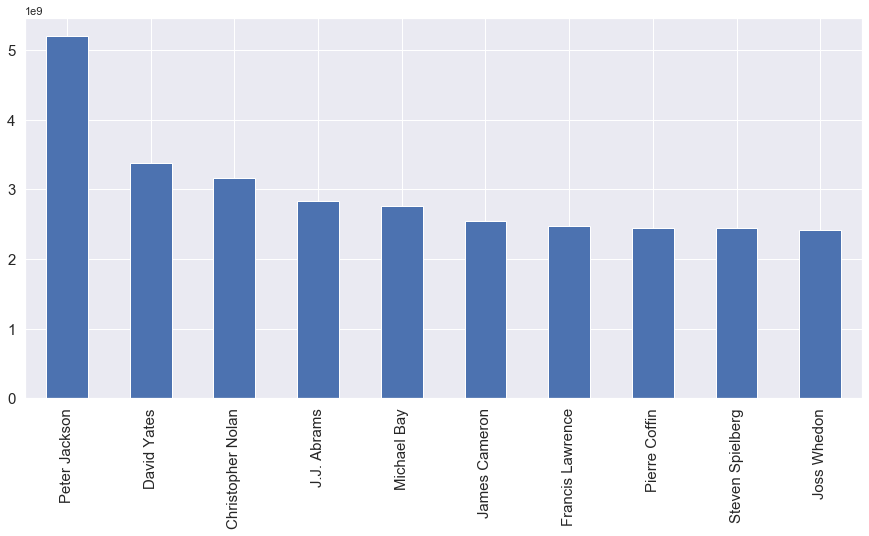

In [31]:
directors.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(15, 7), fontsize=15)

In [45]:
answer_ls.append(5)

# 16. Какой актер принес больше всего прибыли?
Варианты ответов:
1. Emma Watson
2. Johnny Depp
3. Michelle Rodriguez
4. Orlando Bloom
5. Rupert Grint

In [56]:
%%time
profit_counter(data, 'cast')[0]

Wall time: 191 ms


('Emma Watson', 6666245597)

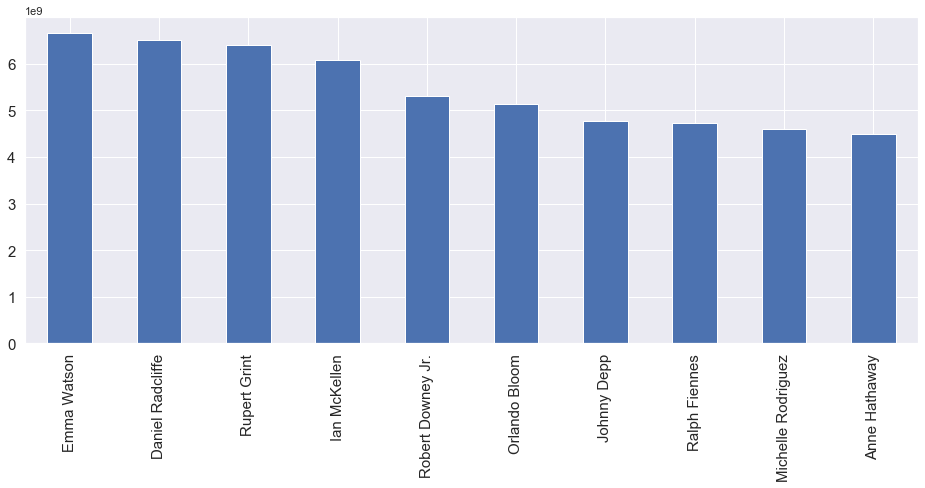

In [71]:
cast_profit = pd.Series([x[1] for x in profit_counter(data, 'cast')],
                        index=[x[0] for x in profit_counter(data, 'cast')])
cast_profit[:10].plot(kind='bar', figsize=(16, 6), fontsize=15)

In [44]:
# This is much faster
# %%time
# actor_profit = Counter()

# i = 0
# for actors in data.cast.str.split('|'):
#     for actor in actors:
#         actor_profit[actor] += data.profit.iloc[i]
#     i += 1
    
# actor_profit.most_common(1)

Wall time: 250 ms


[('Emma Watson', 6666245597)]

In [48]:
answer_ls.append(1)

# 17. Какой актер принес меньше всего прибыли в 2012 году?
Варианты ответов:
1. Nicolas Cage
2. Danny Huston
3. Kirsten Dunst
4. Jim Sturgess
5. Sami Gayle

In [125]:
actor_loss = Counter()
new_data = data.query('release_year == 2012')

i = 0
for actors in new_data.cast:
    for actor in actors:
        actor_loss[actor] += new_data.profit.iloc[i]
    i += 1
    
actor_loss.most_common()[-1]

('Kirsten Dunst', -68109207)

In [50]:
answer_ls.append(3)

# 18. Какой актер снялся в большем количестве высокобюджетных фильмов? (в фильмах где бюджет выше среднего по данной выборке)
Варианты ответов:
1. Tom Cruise
2. Mark Wahlberg 
3. Matt Damon
4. Angelina Jolie
5. Adam Sandler

In [126]:
budget_mean = data.budget.mean()
budget_mean

54506961.474603176

In [127]:
actor_counter = Counter()
high_budget = data[data.budget > budget_mean]

for actors in high_budget.cast:
    for actor in actors:
        actor_counter[actor] += 1
        
actor_counter.most_common(1)

[('Matt Damon', 18)]

In [128]:
# Another option
pd.DataFrame(high_budget.cast.to_list()).stack().value_counts().iloc[[0]]

Matt Damon    18
dtype: int64

In [54]:
answer_ls.append(3)

# 19. В фильмах какого жанра больше всего снимался Nicolas Cage?  
Варианты ответа:
1. Drama
2. Action
3. Thriller
4. Adventure
5. Crime

In [129]:
cage_genre = Counter()

i = 0
for genres in data.genres:
    for genre in genres:
        if 'Nicolas Cage' in data.cast.iloc[i]:
            cage_genre[genre] += 1
    i += 1
    
cage_genre.most_common(1)

[('Action', 17)]

In [11]:
# With mask
data[data['cast'].map(lambda x: True if 'Nicolas Cage' in x else False)]

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
168,tt2467046,2.601775,16000000,19682924,Left Behind,Nicolas Cage|Chad Michael Murray|Lea Thompson|...,Vic Armstrong,The End Begins,A small group of survivors are left behind aft...,110,Thriller|Action|Science Fiction,Stoney Lake Entertainment,10/3/2014,253,3.8,2014,3682924
276,tt0448011,1.357091,50000000,155446362,Knowing,Nicolas Cage|Rose Byrne|Chandler Canterbury|Be...,Alex Proyas,Knowing is everything...,A teacher opens a time capsule that has been d...,121,Action|Adventure|Drama|Mystery|Science Fiction,Summit Entertainment|Mystery Clock Cinema|Esca...,3/19/2009,817,5.7,2009,105446362
330,tt1095217,0.643829,25000000,10589102,The Bad Lieutenant: Port of Call - New Orleans,Nicolas Cage|Eva Mendes|Val Kilmer|Fairuza Bal...,Werner Herzog,The only criminal he can't catch is himself.,"Terrence McDonagh, a New Orleans Police sergea...",122,Drama|Crime,Saturn Films|Nu Image Films|Edward R. Pressman...,9/11/2009,157,5.8,2009,-14410898
336,tt0375568,0.595489,65000000,44091067,Astro Boy,Nicolas Cage|Kristen Bell|Bill Nighy|Donald Su...,David Bowers,Have a blast.,"Set in futuristic Metro City, Astro Boy is abo...",94,Animation|Action|Family|Science Fiction,The Weinstein Company|Summit Entertainment|Tez...,10/15/2009,284,6.0,2009,-20908933
386,tt1250777,2.225609,28000000,96188903,Kick-Ass,Aaron Taylor-Johnson|ChloÃ« Grace Moretz|Chris...,Matthew Vaughn,Shut up. Kick ass.,Dave Lizewski is an unnoticed high school stud...,117,Action|Crime,Lions Gate,3/22/2010,3085,7.0,2010,68188903
392,tt0963966,2.053855,150000000,215283742,The Sorcerer's Apprentice,Nicolas Cage|Jay Baruchel|Monica Bellucci|Alfr...,Jon Turteltaub,It's The Coolest Job Ever.,Balthazar Blake is a master sorcerer in modern...,109,Fantasy|Adventure|Action|Comedy|Drama,Walt Disney Pictures|Jerry Bruckheimer Films|S...,7/13/2010,871,5.8,2010,65283742
688,tt0814022,0.696406,45000000,42487390,Bangkok Dangerous,Nicolas Cage|Shahkrit Yamnarm|Charlie Yeung|Pa...,Oxide Pang Chun|Danny Pang,There's only one way out.,"When carrying out a hit, assassin Joe (Cage) a...",99,Action|Crime|Thriller,Virtual Studios|Initial Entertainment Group|Sa...,8/21/2008,231,5.0,2008,-2512610
728,tt1502404,3.355611,50000000,28931401,Drive Angry,Nicolas Cage|Amber Heard|William Fichtner|Bill...,Patrick Lussier,One hell of a ride.,Milton is a hardened felon who has broken out ...,105,Fantasy|Thriller|Action|Crime,Summit Entertainment|Saturn Films|Nu Image Fil...,2/24/2011,378,5.3,2011,-21068599
765,tt1071875,1.481016,57000000,149217355,Ghost Rider: Spirit of Vengeance,Nicolas Cage|CiarÃ¡n Hinds|Violante Placido|Fe...,Mark Neveldine|Brian Taylor,He Rides Again.,When the devil resurfaces with aims to take ov...,95,Action|Fantasy|Thriller,Columbia Pictures|Imagenation Abu Dhabi FZ|Mar...,12/10/2011,752,4.7,2011,92217355
785,tt0479997,1.119810,40000000,88100000,Season of the Witch,Nicolas Cage|Ron Perlman|Ulrich Thomsen|Christ...,Dominic Sena,Not all souls can be saved.,A 14th century Crusader (Cage) returns with hi...,95,Adventure|Fantasy|Action,Atlas Entertainment|Relativity Media,1/7/2011,453,5.2,2011,48100000


In [56]:
answer_ls.append(2)

# 20. Какая студия сняла больше всего фильмов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [130]:
data.production_companies = data.production_companies.apply(spliter)

In [131]:
prod_counter = Counter()

for companies in data.production_companies:
    for company in companies:
        prod_counter[company] += 1  
        
prod_counter.most_common(1)

[('Universal Pictures', 173)]

In [59]:
answer_ls.append(1)

# 21. Какая студия сняла больше всего фильмов в 2015 году?
Варианты ответа:
1. Universal Pictures
2. Paramount Pictures
3. Columbia Pictures
4. Warner Bros
5. Twentieth Century Fox Film Corporation

In [132]:
new_data = data.query('release_year == 2015')

In [133]:
prod_counter = Counter()

for companies in new_data.production_companies:
    for company in companies:
        prod_counter[company] += 1  
        
prod_counter.most_common(1)

[('Warner Bros.', 12)]

In [62]:
answer_ls.append(4)

# 22. Какая студия заработала больше всего денег в жанре комедий за все время?
Варианты ответа:
1. Warner Bros
2. Universal Pictures (Universal)
3. Columbia Pictures
4. Paramount Pictures
5. Walt Disney

In [134]:
comedy_profit = Counter()

i = 0
for companies in data.production_companies:
    if 'Comedy' in data.genres.iloc[i]:
        for company in companies:
            comedy_profit[company] += data.profit.iloc[i]
    i += 1
    
comedy_profit.most_common(1)

[('Universal Pictures', 8961545581)]

In [64]:
answer_ls.append(2)

# 23. Какая студия заработала больше всего денег в 2012 году?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Columbia Pictures
4. Paramount Pictures
5. Lucasfilm

In [135]:
new_data = data.query('release_year == 2012')

In [136]:
company_profit = Counter()

i = 0
for companies in new_data.production_companies:
    for company in companies:
        company_profit[company] += new_data.profit.iloc[i]
    i += 1
    
company_profit.most_common(1)

[('Columbia Pictures', 2501406608)]

In [67]:
answer_ls.append(3)

# 24. Самый убыточный фильм от Paramount Pictures
Варианты ответа:

1. K-19: The Widowmaker tt0267626
2. Next tt0435705
3. Twisted tt0315297
4. The Love Guru tt0811138
5. The Fighter tt0964517

In [137]:
pp_loss = Counter()

i = 0
for film in data.original_title:
    if 'Paramount Pictures' in data.production_companies.iloc[i]:
        pp_loss[film] += data.profit.iloc[i]
    i += 1
    
pp_loss.most_common()[-1]

('K-19: The Widowmaker', -64831034)

In [69]:
answer_ls.append(1)

# 25. Какой Самый прибыльный год (заработали больше всего)?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2002
5. 2015

In [138]:
data.groupby('release_year').profit.sum().sort_values(ascending=False).head(1)

release_year
2015    18668572378
Name: profit, dtype: int64

In [71]:
answer_ls.append(5)

# 26. Какой Самый прибыльный год для студии Warner Bros?
Варианты ответа:
1. 2014
2. 2008
3. 2012
4. 2010
5. 2015

In [140]:
# 
new_data = pd.read_csv('data.csv')
new_data['profit'] = new_data['revenue'] - new_data['budget']

In [141]:
# We actually need to take into account all the types of this company's names
wb_films = new_data[new_data.production_companies.str.contains('Warner')]
wb_films

,imdb_id,popularity,budget,revenue,original_title,cast,director,tagline,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,profit
11,tt1617661,6.189369,176000003,183987723,Jupiter Ascending,Mila Kunis|Channing Tatum|Sean Bean|Eddie Redm...,Lana Wachowski|Lilly Wachowski,Expand your universe.,In a universe where human genetic material is ...,124,Science Fiction|Fantasy|Action|Adventure,Village Roadshow Pictures|Dune Entertainment|A...,2/4/2015,1937,5.2,2015,7987720
22,tt2126355,4.907832,110000000,470490832,San Andreas,Dwayne Johnson|Alexandra Daddario|Carla Gugino...,Brad Peyton,"A rescue pilot survived an earthquake, this is...",In the aftermath of a massive earthquake in Ca...,114,Action|Drama|Thriller,New Line Cinema|Village Roadshow Pictures|Warn...,5/27/2015,2060,6.1,2015,360490832
40,tt1638355,3.053421,75000000,108145109,The Man from U.N.C.L.E.,Henry Cavill|Armie Hammer|Alicia Vikander|Eliz...,Guy Ritchie,Saving the world never goes out of style.,"At the height of the Cold War, a mysterious cr...",116,Comedy|Action|Adventure,Davis Entertainment|Warner Bros.|Wigram Produc...,8/13/2015,1548,7.0,2015,33145109
46,tt2361509,2.814802,35000000,194564672,The Intern,Robert De Niro|Anne Hathaway|Rene Russo|Anders...,Nancy Meyers,Experience never gets old,70-year-old widower Ben Whittaker has discover...,121,Comedy,Waverly Films|Warner Bros.,9/24/2015,1255,7.1,2015,159564672
59,tt1390411,2.345821,100000000,93820758,In the Heart of the Sea,Chris Hemsworth|Benjamin Walker|Cillian Murphy...,Ron Howard,Based on the incredible true story that inspir...,"In the winter of 1820, the New England whaling...",122,Thriller|Drama|Adventure|Action|History,Imagine Entertainment|Spring Creek Productions...,11/20/2015,805,6.4,2015,-6179242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1858,tt0177971,0.583320,120000000,325756637,The Perfect Storm,George Clooney|Mark Wahlberg|Diane Lane|John C...,Wolfgang Petersen,The storm is coming.,"In October 1991, a confluence of weather condi...",130,Drama,Warner Bros.|Baltimore Spring Creek Production...,3/15/2000,315,5.9,2000,205756637
1874,tt0160009,0.339608,40000000,30199105,The Art of War,Wesley Snipes|Donald Sutherland|Maury Chaykin|...,Christian Duguay,Who is your foe?,When ruthless terrorists threaten to bring dow...,117,Action|Adventure|Thriller,Amen Ra Films|Franchise Pictures|Warner Bros.|...,8/23/2000,67,5.7,2000,-9800895
1879,tt0176783,0.310295,14000000,5108820,Gossip,Joshua Jackson|James Marsden|Kate Hudson|Lena ...,Davis Guggenheim,"It can turn you on, or turn on you.","On a beautiful college campus, something ugly ...",90,Drama|Mystery|Thriller,Warner Bros. Pictures,4/21/2000,34,5.3,2000,-8891180
1883,tt0217756,0.196668,24000000,12372410,Ready to Rumble,David Arquette|Scott Caan|Oliver Platt|Rose Mc...,Brian Robbins,They're headed to the big time...face first.,Two slacker wrestling fans are devastated by t...,107,Action|Comedy|Drama,Bel Air Entertainment|Warner Bros.,4/7/2000,16,4.4,2000,-11627590


In [144]:
wb_films.groupby(['release_year']).profit.sum().sort_values(ascending=False).head(1)

release_year
2014    2295464519
Name: profit, dtype: int64

In [75]:
answer_ls.append(1)

# 27. В каком месяце за все годы суммарно вышло больше всего фильмов?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [12]:
data['release_date'] = pd.to_datetime(data.release_date)

In [146]:
month_counter = Counter()

for month in data.release_date.dt.month:
    month_counter[month] += 1
    
month_counter.most_common(1)

[(9, 227)]

In [13]:
# Better option
data.release_date.dt.month.value_counts()

9     227
12    191
10    186
8     161
3     156
4     149
6     147
11    146
7     142
5     140
2     135
1     110
Name: release_date, dtype: int64

In [78]:
answer_ls.append(4)

# 28. Сколько суммарно вышло фильмов летом? (за июнь, июль, август)
Варианты ответа:
1. 345
2. 450
3. 478
4. 523
5. 381

In [147]:
summer_counter = Counter()

for month in data.release_date.dt.month:
    if 6 <= month <= 8:
        summer_counter['summer'] += 1
        
summer_counter.most_common(1)

[('summer', 450)]

In [80]:
answer_ls.append(2)

# 29. Какой режисер выпускает (суммарно по годам) больше всего фильмов зимой?
Варианты ответов:
1. Steven Soderbergh
2. Christopher Nolan
3. Clint Eastwood
4. Ridley Scott
5. Peter Jackson

In [148]:
winter_directors = data[data.release_date.dt.month.isin([12, 1, 2])]

In [151]:
# It's quite impressive that one film might have 11 directors, isn't it?
winter_directors.director.values

array([list(['J.J. Abrams']), list(['Alejandro GonzÃ¡lez IÃ±Ã¡rritu']),
       list(['Lana Wachowski', 'Lilly Wachowski']),
       list(['Alex Garland']), list(['Quentin Tarantino']),
       list(['Olivier Megaton']), list(['Sam Taylor-Johnson']),
       list(['Adam McKay']), list(['Matthew Vaughn']),
       list(['Ericson Core']), list(['David Koepp']),
       list(['Michael Mann']), list(['Glenn Ficarra', 'John Requa']),
       list(['Sean Anders']), list(['Ari Sandel']),
       list(['Jeremy Garelick']), list(['Jason Moore']),
       list(['Dean Israelite']), list(['Paul Tibbitt']),
       list(['Pierre Morel']), list(['Mike Binder']),
       list(['Peter Jackson']), list(['Shawn Levy']),
       list(['Wes Anderson']), list(['Evan Goldberg', 'Seth Rogen']),
       list(['Clint Eastwood']), list(['Ridley Scott']),
       list(['Phil Lord', 'Christopher Miller']), list(['Sergey Bodrov']),
       list(['Rob Marshall']), list(['J.C. Chandor']),
       list(['Tim Story']), list(['Paul Th

In [152]:
pd.DataFrame(winter_directors.director.to_list()).stack().value_counts().iloc[[0]]

Peter Jackson    7
dtype: int64

In [84]:
answer_ls.append(5)

# 30. Какой месяц чаще всего по годам самый прибыльный?
Варианты ответа:
1. Январь
2. Июнь
3. Декабрь
4. Сентябрь
5. Май

In [153]:
data['release_month'] = data.release_date.dt.month

In [154]:
pvt = pd.pivot_table(data, index='release_month', columns='release_year', values='profit', aggfunc='sum')
pvt.idxmax().value_counts().iloc[[0]]

6    7
dtype: int64

In [87]:
answer_ls.append(2)

# 31. Названия фильмов какой студии в среднем самые длинные по количеству символов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

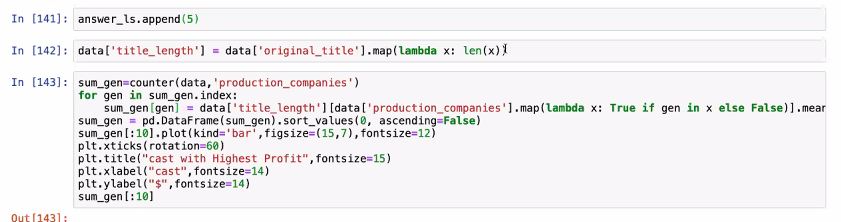

In [155]:
length = Counter()
prod_counter = Counter()

i = 0
for companies in data.production_companies:
    for company in companies:
        length[company] += len(data.original_title.iloc[i])
        prod_counter[company] += 1
    i += 1

In [156]:
film_amount = pd.Series([x[1] for x in prod_counter.most_common()], index=[x[0] for x in prod_counter.most_common()])
title_length = pd.Series([x[1] for x in length.most_common()], index=[x[0] for x in length.most_common()])
(title_length / film_amount).sort_values(ascending=False).iloc[[0]]

Four By Two Productions    83.0
dtype: float64

In [90]:
answer_ls.append(5)

# 32. Названия фильмов какой студии в среднем самые длинные по количеству слов?
Варианты ответа:
1. Universal Pictures (Universal)
2. Warner Bros
3. Jim Henson Company, The
4. Paramount Pictures
5. Four By Two Productions

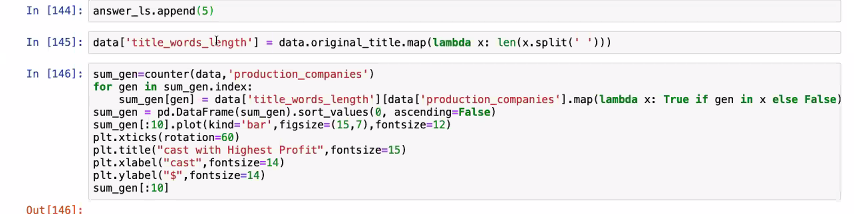

In [157]:
title_words = Counter()

i = 0
for companies in data.production_companies:
    for company in companies:
        title_words[company] += len(data.original_title.iloc[i].split())
    i += 1

In [158]:
title_length = pd.Series([x[1] for x in title_words.most_common()], index=[x[0] for x in title_words.most_common()])
(title_length / film_amount).sort_values(ascending=False).iloc[[0]]

Four By Two Productions    12.0
dtype: float64

In [93]:
answer_ls.append(5)

# 33. Сколько разных слов используется в названиях фильмов?(без учета регистра)
Варианты ответа:
1. 6540
2. 1002
3. 2461
4. 28304
5. 3432

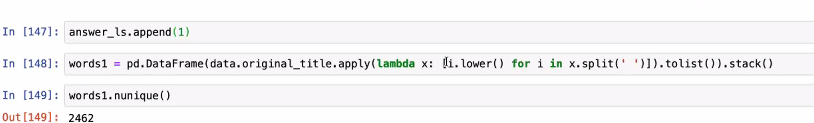

In [159]:
unique_words = set()

for title in data.original_title:
    for word in title.lower().split():
        unique_words.add(word) 
        
len(unique_words)

2461

In [95]:
answer_ls.append(3)

# 34. Какие фильмы входят в 1 процент лучших по рейтингу?
Варианты ответа:
1. Inside Out, Gone Girl, 12 Years a Slave
2. BloodRayne, The Adventures of Rocky and Bullwinkle
3. The Lord of the Rings: The Return of the King, Upside Down
4. 300, Lucky Number Slevin
5. Upside Down, 300, Inside Out, The Lord of the Rings: The Return of the King

In [160]:
data[['original_title', 'vote_average']].sort_values(by='vote_average', ascending=False)[:round(len(data)*0.01)]

,original_title,vote_average
600,The Dark Knight,8.1
125,The Imitation Game,8.0
9,Inside Out,8.0
118,Interstellar,8.0
34,Room,8.0
1082,The Lord of the Rings: The Return of the King,7.9
873,The Pianist,7.9
1801,Memento,7.9
1192,12 Years a Slave,7.9
128,Gone Girl,7.9


In [14]:
data.quantile(0.99, numeric_only=True).vote_average

7.8

In [97]:
answer_ls.append(1)

# 35. Какие актеры чаще всего снимаются в одном фильме вместе
Варианты ответа:
1. Johnny Depp & Helena Bonham Carter
2. Hugh Jackman & Ian McKellen
3. Vin Diesel & Paul Walker
4. Adam Sandler & Kevin James
5. Daniel Radcliffe & Rupert Grint

In [162]:
actor_pairs = Counter()

for actors in data.cast:
    for pair in itertools.combinations(actors, 2):
        actor_pairs[pair] += 1
        
actor_pairs.most_common(1)

[(('Daniel Radcliffe', 'Rupert Grint'), 8)]

In [99]:
answer_ls.append(5)

# 36. У какого из режиссеров выше вероятность выпустить фильм в прибыли? (5 баллов)
Варианты ответа:
1. Quentin Tarantino
2. Steven Soderbergh
3. Robert Rodriguez
4. Christopher Nolan
5. Clint Eastwood

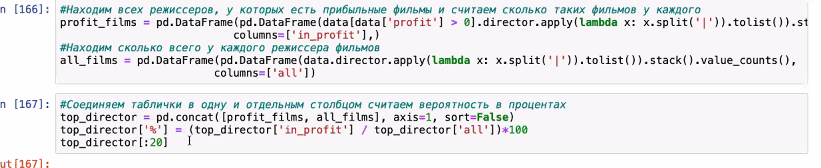

In [163]:
films = Counter()
profit_films = Counter()

i = 0
for directors in data.director:
    for director in directors:
        if data.profit.iloc[i] > 0:
            films[director] += 1
            profit_films[director] += 1
        else:
            films[director] += 1
    i += 1

In [164]:
film_amount = pd.Series([x[1] for x in films.most_common()], index=[x[0] for x in films.most_common()])
profitable_films = pd.Series([x[1] for x in profit_films.most_common()], index=[x[0] for x in profit_films.most_common()])
probability = (profitable_films / film_amount)

In [165]:
probability.loc[['Quentin Tarantino',
                 'Steven Soderbergh',
                 'Robert Rodriguez',
                 'Christopher Nolan',
                 'Clint Eastwood']].sort_values(ascending = False).iloc[[0]]

Christopher Nolan    1.0
dtype: float64

In [104]:
answer_ls.append(4)

# Submission

In [105]:
len(answer_ls)

36

In [106]:
pd.DataFrame({'Id':range(1,len(answer_ls)+1), 'Answer':answer_ls})

,Id,Answer
0,1,4
1,2,2
2,3,3
3,4,2
4,5,1
5,6,5
6,7,2
7,8,1
8,9,4
9,10,5
